In [1]:
import pandas as pd
from keras.layers import Input, Dense
from keras.models import Model
import numpy as np
import __init__
from __init__ import DATA_PATH
from __init__ import PACKAGE_PATH
import matplotlib.pyplot as plt
import os
import sklearn.metrics as metrics

Using TensorFlow backend.


In [2]:
data = pd.read_csv(os.path.join(DATA_PATH,'BOD_biclass_139rdkit.csv'))

In [3]:
data.head()

,SMILES,bod_class,exactmw,lipinskiHBA,lipinskiHBD,NumRotatableBonds,NumHBD,NumHBA,NumHeteroatoms,NumAmideBonds,...,MQN33,MQN34,MQN35,MQN36,MQN37,MQN38,MQN39,MQN40,MQN41,MQN42
0,CCC1(C(=O)NC(=O)NC1=O)c2ccccc2,0,232.084792,5.0,2.0,2.0,2.0,3.0,5.0,4.0,...,0,0,0,2,0,0,0,0,0,0
1,CC(O)C(O)=O,1,90.031694,3.0,2.0,1.0,2.0,2.0,3.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,Clc1ccc(cc1)C(c2ccc(Cl)cc2)C(Cl)(Cl)Cl,0,351.914689,0.0,0.0,2.0,0.0,0.0,5.0,0.0,...,0,0,0,2,0,0,0,0,0,0
3,OC(=O)c1c(Cl)ccc(Cl)c1Cl,1,223.919862,2.0,1.0,1.0,1.0,1.0,5.0,0.0,...,0,0,0,1,0,0,0,0,0,0
4,OCC(O)C(O)C(O)C(O)CO,1,182.079038,6.0,6.0,5.0,6.0,6.0,6.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
data.shape

(1063, 141)

In [5]:
data_139 = data.iloc[:,2:141]
data_139.shape

(1063, 139)

In [6]:
data_train = data_139.values
data_train

array([[232.08479224,   5.        ,   2.        , ...,   0.        ,
          0.        ,   0.        ],
       [ 90.03169405,   3.        ,   2.        , ...,   0.        ,
          0.        ,   0.        ],
       [351.91468869,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       ...,
       [416.05552905,   8.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [314.20345083,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [160.10994437,   3.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ]])

### start with a simple vanilla autoencoder

In [7]:
input_size = 139
hidden_size = 16
output_size = 139

x = Input(shape=(input_size,))

# Encoder
h = Dense(hidden_size, activation='relu')(x)

# Decoder
r = Dense(output_size, activation='sigmoid')(h)

autoencoder = Model(input=x, output=r)
autoencoder.compile(optimizer='adam', loss='mse')

Instructions for updating:
Colocations handled automatically by placer.


C:\Users\Yang\.conda\envs\deepchembed\lib\site-packages\ipykernel_launcher.py:13: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`
  del sys.path[0]


In [8]:
history16 = autoencoder.fit(data_train,data_train,epochs= 250,batch_size=256,shuffle=True)

Instructions for updating:
Use tf.cast instead.
Epoch 1/250
1063/1063 [==============================] - 0s 164us/step - loss: 1326.4417
Epoch 2/250
1063/1063 [==============================] - 0s 14us/step - loss: 1325.3771
Epoch 3/250
1063/1063 [==============================] - 0s 15us/step - loss: 1323.7256
Epoch 4/250
1063/1063 [==============================] - 0s 19us/step - loss: 1322.8457
Epoch 5/250
1063/1063 [==============================] - 0s 13us/step - loss: 1322.3203
Epoch 6/250
1063/1063 [==============================] - 0s 18us/step - loss: 1321.6962
Epoch 7/250
1063/1063 [==============================] - 0s 15us/step - loss: 1320.9053
Epoch 8/250
1063/1063 [==============================] - 0s 17us/step - loss: 1320.0848
Epoch 9/250
1063/1063 [==============================] - 0s 17us/step - loss: 1319.3872
Epoch 10/250
1063/1063 [==============================] - 0s 14us/step - loss: 1318.9943
Epoch 11/250
1063/1063 [==============================] - 0s 14us/step

1063/1063 [==============================] - 0s 17us/step - loss: 1318.2977
Epoch 91/250
1063/1063 [==============================] - 0s 11us/step - loss: 1318.2968
Epoch 92/250
1063/1063 [==============================] - 0s 13us/step - loss: 1318.2956
Epoch 93/250
1063/1063 [==============================] - 0s 16us/step - loss: 1318.2943
Epoch 94/250
1063/1063 [==============================] - 0s 12us/step - loss: 1318.2933
Epoch 95/250
1063/1063 [==============================] - 0s 22us/step - loss: 1318.2922
Epoch 96/250
1063/1063 [==============================] - 0s 18us/step - loss: 1318.2913
Epoch 97/250
1063/1063 [==============================] - 0s 20us/step - loss: 1318.2905
Epoch 98/250
1063/1063 [==============================] - 0s 18us/step - loss: 1318.2897
Epoch 99/250
1063/1063 [==============================] - 0s 20us/step - loss: 1318.2890
Epoch 100/250
1063/1063 [==============================] - 0s 22us/step - loss: 1318.2881
Epoch 101/250
1063/1063 [========

1063/1063 [==============================] - 0s 15us/step - loss: 1318.2463
Epoch 182/250
1063/1063 [==============================] - 0s 16us/step - loss: 1318.2458
Epoch 183/250
1063/1063 [==============================] - 0s 12us/step - loss: 1318.2452
Epoch 184/250
1063/1063 [==============================] - 0s 12us/step - loss: 1318.2449
Epoch 185/250
1063/1063 [==============================] - 0s 15us/step - loss: 1318.2447
Epoch 186/250
1063/1063 [==============================] - 0s 13us/step - loss: 1318.2441
Epoch 187/250
1063/1063 [==============================] - 0s 22us/step - loss: 1318.2439
Epoch 188/250
1063/1063 [==============================] - 0s 21us/step - loss: 1318.2436
Epoch 189/250
1063/1063 [==============================] - 0s 18us/step - loss: 1318.2434
Epoch 190/250
1063/1063 [==============================] - 0s 17us/step - loss: 1318.2430
Epoch 191/250
1063/1063 [==============================] - 0s 17us/step - loss: 1318.2431
Epoch 192/250
1063/1063 

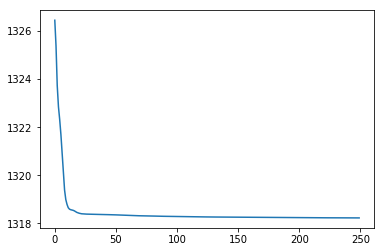

In [9]:
plt.plot(history16.history['loss'])

In [10]:
x_recons=autoencoder.predict(data_train)

In [11]:
x_recons.shape

(1063, 139)

In [12]:
metrics.mean_squared_error(data_train,x_recons)

1318.2301208995996

In [13]:
input_size = 139
hidden_size = 32 # larger hidden layer
output_size = 139

x = Input(shape=(input_size,))

# Encoder
h = Dense(hidden_size, activation='relu')(x)

# Decoder
r = Dense(output_size, activation='sigmoid')(h)

autoencoder = Model(input=x, output=r)
autoencoder.compile(optimizer='adam', loss='mse')

C:\Users\Yang\.conda\envs\deepchembed\lib\site-packages\ipykernel_launcher.py:13: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`
  del sys.path[0]


In [14]:
#larger hidden layer

In [15]:
history32 = autoencoder.fit(data_train,data_train,epochs= 250,batch_size=256,shuffle=True)

Epoch 1/250
1063/1063 [==============================] - 0s 162us/step - loss: 1326.4450
Epoch 2/250
1063/1063 [==============================] - 0s 14us/step - loss: 1325.3917
Epoch 3/250
1063/1063 [==============================] - 0s 16us/step - loss: 1323.9711
Epoch 4/250
1063/1063 [==============================] - 0s 17us/step - loss: 1321.9878
Epoch 5/250
1063/1063 [==============================] - 0s 17us/step - loss: 1320.5386
Epoch 6/250
1063/1063 [==============================] - 0s 18us/step - loss: 1319.7555
Epoch 7/250
1063/1063 [==============================] - 0s 18us/step - loss: 1319.3049
Epoch 8/250
1063/1063 [==============================] - 0s 19us/step - loss: 1319.0452
Epoch 9/250
1063/1063 [==============================] - 0s 14us/step - loss: 1318.7525
Epoch 10/250
1063/1063 [==============================] - 0s 19us/step - loss: 1318.5463
Epoch 11/250
1063/1063 [==============================] - 0s 18us/step - loss: 1318.4559
Epoch 12/250
1063/1063 [=====

1063/1063 [==============================] - 0s 18us/step - loss: 1318.3066
Epoch 94/250
1063/1063 [==============================] - 0s 14us/step - loss: 1318.3058
Epoch 95/250
1063/1063 [==============================] - 0s 16us/step - loss: 1318.3049
Epoch 96/250
1063/1063 [==============================] - 0s 14us/step - loss: 1318.3043
Epoch 97/250
1063/1063 [==============================] - 0s 13us/step - loss: 1318.3037
Epoch 98/250
1063/1063 [==============================] - 0s 21us/step - loss: 1318.3028
Epoch 99/250
1063/1063 [==============================] - 0s 21us/step - loss: 1318.3027
Epoch 100/250
1063/1063 [==============================] - 0s 19us/step - loss: 1318.3022
Epoch 101/250
1063/1063 [==============================] - 0s 22us/step - loss: 1318.3014
Epoch 102/250
1063/1063 [==============================] - 0s 21us/step - loss: 1318.3007
Epoch 103/250
1063/1063 [==============================] - 0s 22us/step - loss: 1318.2995
Epoch 104/250
1063/1063 [=====

Epoch 184/250
1063/1063 [==============================] - 0s 17us/step - loss: 1318.2553
Epoch 185/250
1063/1063 [==============================] - 0s 14us/step - loss: 1318.2542
Epoch 186/250
1063/1063 [==============================] - 0s 20us/step - loss: 1318.2539
Epoch 187/250
1063/1063 [==============================] - 0s 15us/step - loss: 1318.2535
Epoch 188/250
1063/1063 [==============================] - 0s 20us/step - loss: 1318.2530
Epoch 189/250
1063/1063 [==============================] - 0s 18us/step - loss: 1318.2528
Epoch 190/250
1063/1063 [==============================] - 0s 23us/step - loss: 1318.2523
Epoch 191/250
1063/1063 [==============================] - 0s 19us/step - loss: 1318.2518
Epoch 192/250
1063/1063 [==============================] - 0s 20us/step - loss: 1318.2514
Epoch 193/250
1063/1063 [==============================] - 0s 21us/step - loss: 1318.2511
Epoch 194/250
1063/1063 [==============================] - 0s 20us/step - loss: 1318.2507
Epoch 195/

In [16]:
x_recons=autoencoder.predict(data_train)

In [17]:
metrics.mean_squared_error(data_train,x_recons)

1318.2274114119252

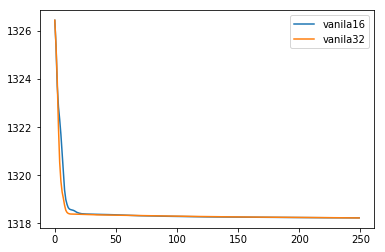

In [18]:
plt.plot(history16.history['loss'],label='vanila16')
plt.plot(history32.history['loss'],label='vanila32')
plt.legend()

#### regularized autoencoder

In [19]:
# regularized autoencoder
from keras import regularizers

In [20]:
input_size = 139
hidden_size = 32
output_size = 139

x = Input(shape=(input_size,))

# Encoder
h = Dense(hidden_size, activation='relu', activity_regularizer=regularizers.l1(10e-5))(x)

# Decoder
r = Dense(output_size, activation='sigmoid')(h)

autoencoder = Model(input=x, output=r)
autoencoder.compile(optimizer='adam', loss='mse')

C:\Users\Yang\.conda\envs\deepchembed\lib\site-packages\ipykernel_launcher.py:13: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`
  del sys.path[0]


In [21]:
history_l1 = autoencoder.fit(data_train,data_train,epochs= 250,batch_size=256,shuffle=True)

Epoch 1/250
1063/1063 [==============================] - 0s 190us/step - loss: 1333.1667
Epoch 2/250
1063/1063 [==============================] - 0s 17us/step - loss: 1331.1513
Epoch 3/250
1063/1063 [==============================] - 0s 15us/step - loss: 1329.8322
Epoch 4/250
1063/1063 [==============================] - 0s 20us/step - loss: 1328.6112
Epoch 5/250
1063/1063 [==============================] - 0s 20us/step - loss: 1327.3422
Epoch 6/250
1063/1063 [==============================] - 0s 21us/step - loss: 1326.2411
Epoch 7/250
1063/1063 [==============================] - 0s 14us/step - loss: 1325.3150
Epoch 8/250
1063/1063 [==============================] - 0s 14us/step - loss: 1324.5577
Epoch 9/250
1063/1063 [==============================] - 0s 15us/step - loss: 1323.8681
Epoch 10/250
1063/1063 [==============================] - 0s 21us/step - loss: 1323.2975
Epoch 11/250
1063/1063 [==============================] - 0s 14us/step - loss: 1322.7259
Epoch 12/250
1063/1063 [=====

1063/1063 [==============================] - 0s 13us/step - loss: 1318.8682
Epoch 93/250
1063/1063 [==============================] - 0s 18us/step - loss: 1318.8638
Epoch 94/250
1063/1063 [==============================] - 0s 13us/step - loss: 1318.8597
Epoch 95/250
1063/1063 [==============================] - 0s 18us/step - loss: 1318.8577
Epoch 96/250
1063/1063 [==============================] - 0s 13us/step - loss: 1318.8530
Epoch 97/250
1063/1063 [==============================] - 0s 13us/step - loss: 1318.8491
Epoch 98/250
1063/1063 [==============================] - 0s 21us/step - loss: 1318.8429
Epoch 99/250
1063/1063 [==============================] - 0s 18us/step - loss: 1318.8426
Epoch 100/250
1063/1063 [==============================] - 0s 23us/step - loss: 1318.8382
Epoch 101/250
1063/1063 [==============================] - 0s 18us/step - loss: 1318.8346
Epoch 102/250
1063/1063 [==============================] - 0s 20us/step - loss: 1318.8324
Epoch 103/250
1063/1063 [======

1063/1063 [==============================] - 0s 16us/step - loss: 1318.6573
Epoch 184/250
1063/1063 [==============================] - 0s 18us/step - loss: 1318.6563
Epoch 185/250
1063/1063 [==============================] - 0s 20us/step - loss: 1318.6543
Epoch 186/250
1063/1063 [==============================] - 0s 19us/step - loss: 1318.6529
Epoch 187/250
1063/1063 [==============================] - 0s 23us/step - loss: 1318.6524
Epoch 188/250
1063/1063 [==============================] - 0s 20us/step - loss: 1318.6520
Epoch 189/250
1063/1063 [==============================] - 0s 21us/step - loss: 1318.6507
Epoch 190/250
1063/1063 [==============================] - 0s 19us/step - loss: 1318.6496
Epoch 191/250
1063/1063 [==============================] - 0s 20us/step - loss: 1318.6495
Epoch 192/250
1063/1063 [==============================] - 0s 20us/step - loss: 1318.6475
Epoch 193/250
1063/1063 [==============================] - 0s 23us/step - loss: 1318.6473
Epoch 194/250
1063/1063 

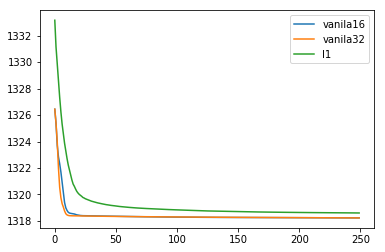

In [22]:
plt.plot(history16.history['loss'],label='vanila16')
plt.plot(history32.history['loss'],label='vanila32')
plt.plot(history_l1.history['loss'],label='l1')
plt.legend()

### A multilayer example

In [23]:
input_size = 139
hidden_size = 64
code_size = 32

x = Input(shape=(input_size,))

# Encoder
hidden_1 = Dense(hidden_size, activation='relu')(x)
h = Dense(code_size, activation='relu')(hidden_1)

# Decoder
hidden_2 = Dense(hidden_size, activation='relu')(h)
r = Dense(input_size, activation='sigmoid')(hidden_2)

autoencoder = Model(input=x, output=r)
autoencoder.compile(optimizer='adam', loss='mse')

C:\Users\Yang\.conda\envs\deepchembed\lib\site-packages\ipykernel_launcher.py:15: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`
  from ipykernel import kernelapp as app


In [24]:
history_ml = autoencoder.fit(data_train,data_train,epochs= 250,batch_size=256,shuffle=True)

Epoch 1/250
1063/1063 [==============================] - 0s 296us/step - loss: 1322.0514
Epoch 2/250
1063/1063 [==============================] - 0s 24us/step - loss: 1321.0136
Epoch 3/250
1063/1063 [==============================] - 0s 19us/step - loss: 1320.4560
Epoch 4/250
1063/1063 [==============================] - 0s 24us/step - loss: 1320.1661
Epoch 5/250
1063/1063 [==============================] - 0s 23us/step - loss: 1319.6990
Epoch 6/250
1063/1063 [==============================] - 0s 19us/step - loss: 1319.4723
Epoch 7/250
1063/1063 [==============================] - 0s 22us/step - loss: 1319.3032
Epoch 8/250
1063/1063 [==============================] - 0s 20us/step - loss: 1319.1555
Epoch 9/250
1063/1063 [==============================] - 0s 22us/step - loss: 1318.8737
Epoch 10/250
1063/1063 [==============================] - 0s 26us/step - loss: 1318.5046
Epoch 11/250
1063/1063 [==============================] - 0s 26us/step - loss: 1318.3882
Epoch 12/250
1063/1063 [=====

1063/1063 [==============================] - 0s 25us/step - loss: 1318.2542
Epoch 94/250
1063/1063 [==============================] - 0s 17us/step - loss: 1318.2535
Epoch 95/250
1063/1063 [==============================] - 0s 21us/step - loss: 1318.2529
Epoch 96/250
1063/1063 [==============================] - 0s 16us/step - loss: 1318.2526
Epoch 97/250
1063/1063 [==============================] - 0s 27us/step - loss: 1318.2520
Epoch 98/250
1063/1063 [==============================] - 0s 23us/step - loss: 1318.2513
Epoch 99/250
1063/1063 [==============================] - ETA: 0s - loss: 658.848 - 0s 23us/step - loss: 1318.2509
Epoch 100/250
1063/1063 [==============================] - 0s 23us/step - loss: 1318.2502
Epoch 101/250
1063/1063 [==============================] - 0s 27us/step - loss: 1318.2497
Epoch 102/250
1063/1063 [==============================] - 0s 26us/step - loss: 1318.2487
Epoch 103/250
1063/1063 [==============================] - 0s 29us/step - loss: 1318.2480
Epoc

Epoch 184/250
1063/1063 [==============================] - 0s 23us/step - loss: 1318.2127
Epoch 185/250
1063/1063 [==============================] - 0s 20us/step - loss: 1318.2121
Epoch 186/250
1063/1063 [==============================] - 0s 16us/step - loss: 1318.2119
Epoch 187/250
1063/1063 [==============================] - 0s 23us/step - loss: 1318.2112
Epoch 188/250
1063/1063 [==============================] - 0s 23us/step - loss: 1318.2105
Epoch 189/250
1063/1063 [==============================] - 0s 27us/step - loss: 1318.2101
Epoch 190/250
1063/1063 [==============================] - 0s 25us/step - loss: 1318.2094
Epoch 191/250
1063/1063 [==============================] - 0s 23us/step - loss: 1318.2093
Epoch 192/250
1063/1063 [==============================] - 0s 25us/step - loss: 1318.2092
Epoch 193/250
1063/1063 [==============================] - 0s 22us/step - loss: 1318.2094
Epoch 194/250
1063/1063 [==============================] - 0s 20us/step - loss: 1318.2096
Epoch 195/

(1318, 1319)

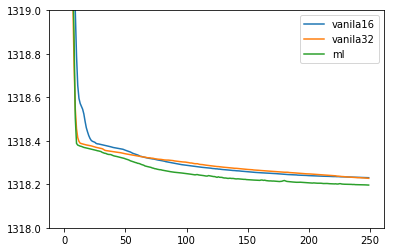

In [25]:
plt.plot(history16.history['loss'],label='vanila16')
plt.plot(history32.history['loss'],label='vanila32')

plt.plot(history_ml.history['loss'],label='ml')
plt.legend()
plt.ylim([1318,1319]) #zoom